In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
sns.set(style = 'white')

Let us read the data file in the python notebook



In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Let's explore the data to see if there are any missing values.



In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#Removing missing values 
df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
# Convert all boolean columns to integers (1/0)
df_dummies = df_dummies.astype(int)
df_dummies.head()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1980\1187878077.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1980\1187878077.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56,1889,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53,108,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42,1840,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70,151,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<Axes: >

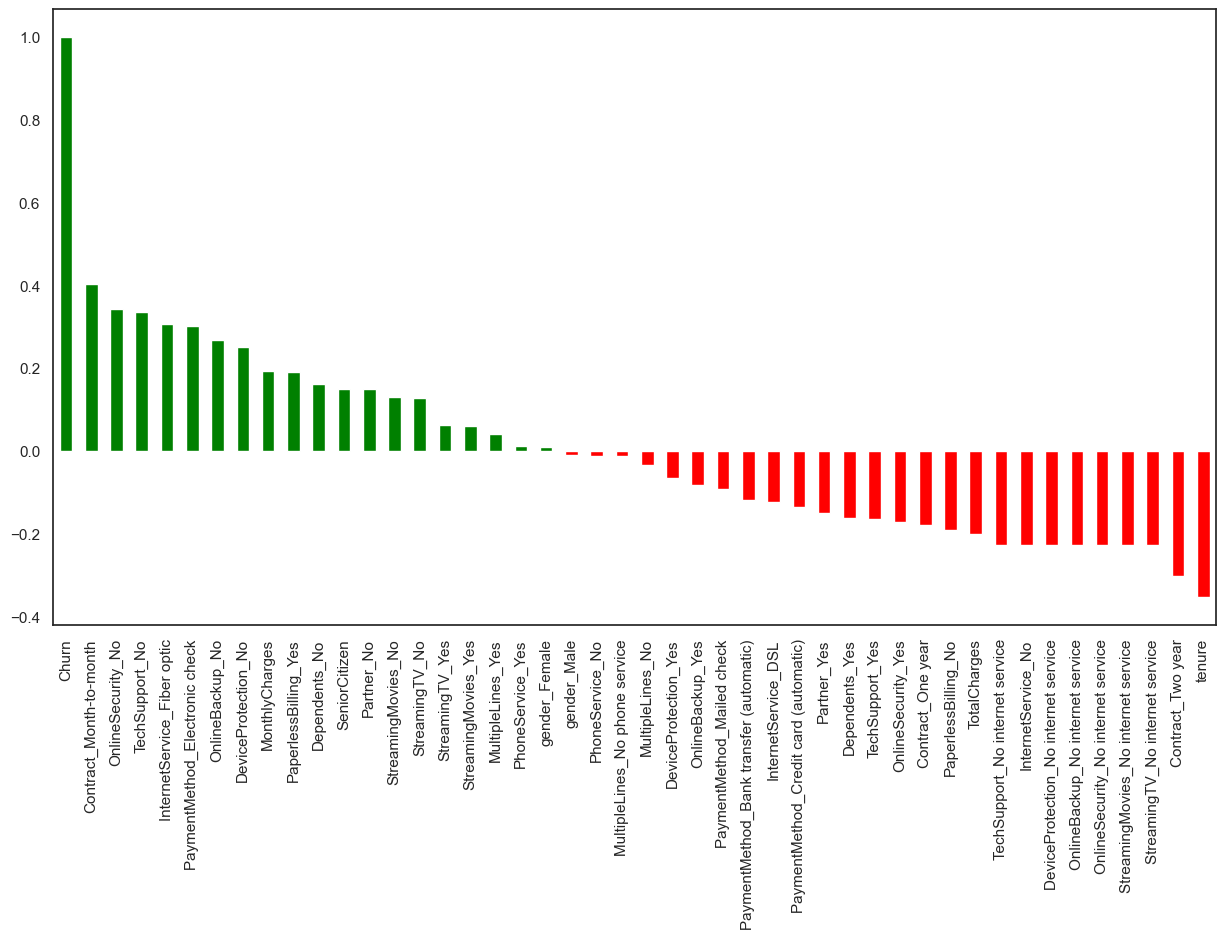

In [12]:

correlations = df_dummies.corr()['Churn'].sort_values(ascending=False)

# Assign colors: green for positive, red for negative
colors = ['green' if val > 0 else 'red' for val in correlations]

# Plot with custom colors
plt.figure(figsize=(15,8))
correlations.plot(kind='bar', color=colors)

**Data Exploration**

**A.) Demographics** - Let us first understand the gender, age range, patner and dependent status of the customers

1. Gender Distribution

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1980\1967377413.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')


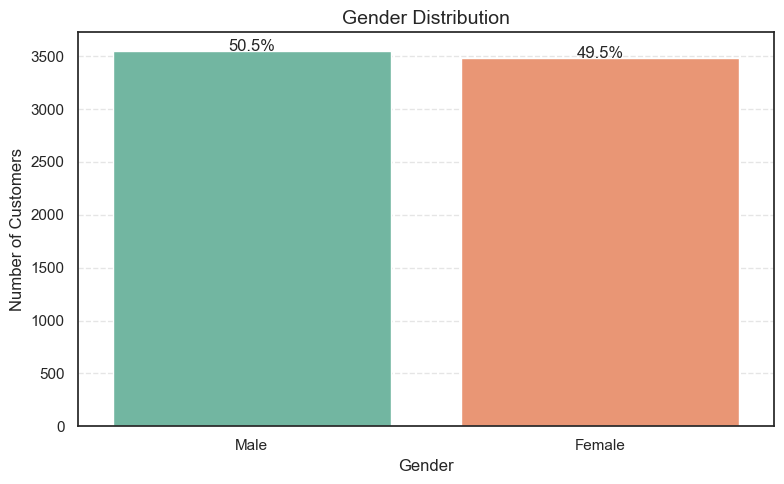

In [14]:
# Count and calculate percentages
gender_counts = df['gender'].value_counts()
gender_percent = (gender_counts / gender_counts.sum()) * 100

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')

# Add percentage labels on top of bars
for i, (count, percent) in enumerate(zip(gender_counts, gender_percent)):
    plt.text(i, count + 5, f'{percent:.1f}%', ha='center', fontsize=12)

plt.title('Gender Distribution', fontsize=14)
plt.ylabel('Number of Customers')
plt.xlabel('Gender')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


2. Senior Citizens 

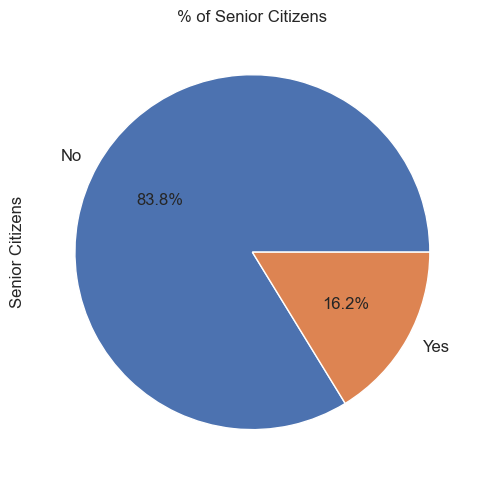

In [ ]:
# Calculate percentage distribution
senior_pct = df['SeniorCitizen'].value_counts(normalize=True) * 100

# Plot pie chart
ax = senior_pct.plot.pie(
    autopct='%.1f%%',
    labels=['No', 'Yes'],
    figsize=(5,5),
    fontsize=12, 
)

# Styling
ax.set_ylabel('Senior Citizens', fontsize=12)
ax.set_title('% of Senior Citizens', fontsize=12)
plt.tight_layout()
plt.show()


3. Partner and dependent status

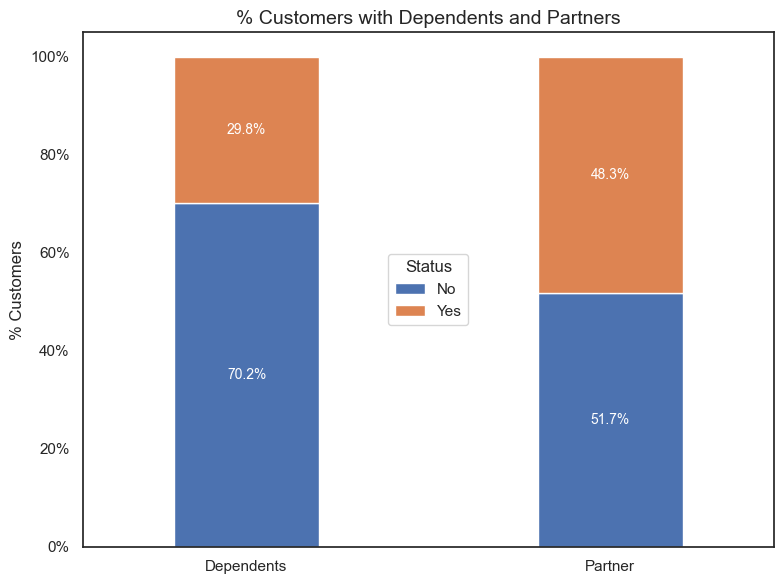

In [ ]:
# Melt the data to long format
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])

# Group and calculate percentage
df3 = df2.groupby(['variable', 'value']).count().unstack()
df3 = df3 * 100 / len(df)

# Plot

ax = df3.loc[:, 'customerID'].plot.bar(
    stacked=True,
    figsize=(8, 6),
    rot=0,
    width=0.4
)

# Format
ax.set_title('% Customers with Dependents and Partners', fontsize=14)
ax.set_ylabel('% Customers', fontsize=12)
ax.set_xlabel('')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(title='Status', labels=['No', 'Yes'], loc='center')

# Add percentage labels on each bar segment
for i, attr in enumerate(df3.index):  # 'Dependents', 'Partner'
    cumulative = 0
    for j, status in enumerate(df3.columns):  # 'No', 'Yes'
        value = df3.loc[attr, status]
        cumulative += value
        ax.text(
            i, cumulative - value / 2, f'{value:.1f}%', 
            ha='center', va='center', color='white', fontsize=10
        )

plt.tight_layout()
plt.show()


**B.) Customer Account Information**

1. Tenure:

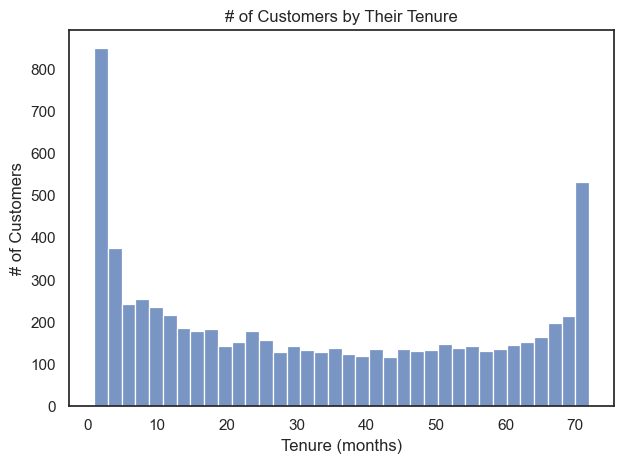

In [24]:
ax = sns.histplot(
    df['tenure'],
    bins=36
)

ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by Their Tenure')

plt.tight_layout()
plt.show()


2. Contracts:

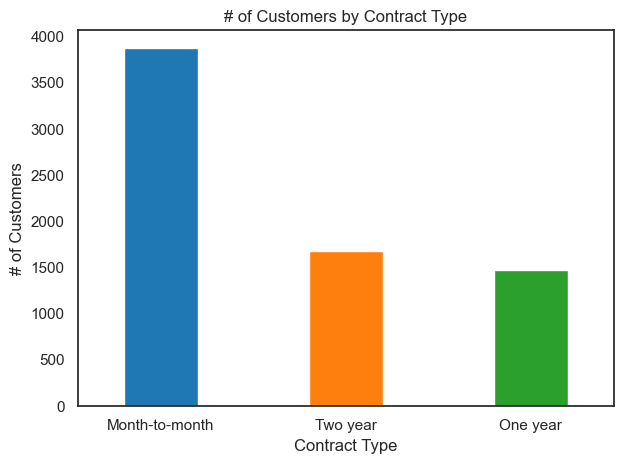

In [30]:
contract_counts = df['Contract'].value_counts()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

ax = contract_counts.plot(kind='bar',
    color=colors,
    rot=0,
    width=0.4
    )
ax.set_ylabel('# of Customers')
ax.set_xlabel('Contract Type')
ax.set_title('# of Customers by Contract Type')
plt.tight_layout()
plt.show()

The tenure of customers based on their contract type.

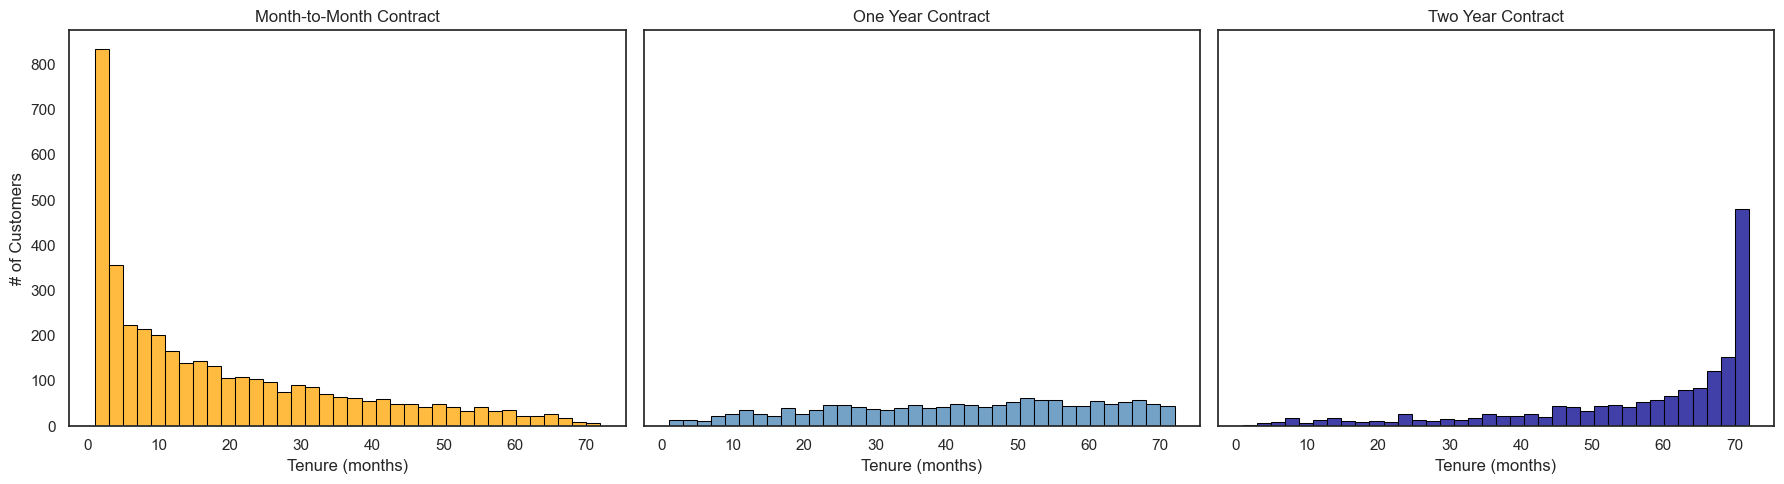

In [31]:

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Month-to-Month
sns.histplot(
    df[df['Contract'] == 'Month-to-month']['tenure'],
    bins=36, color='orange', edgecolor='black', ax=axes[0]
)
axes[0].set_title('Month-to-Month Contract')
axes[0].set_xlabel('Tenure (months)')
axes[0].set_ylabel('# of Customers')

# One Year
sns.histplot(
    df[df['Contract'] == 'One year']['tenure'],
    bins=36, color='steelblue', edgecolor='black', ax=axes[1]
)
axes[1].set_title('One Year Contract')
axes[1].set_xlabel('Tenure (months)')

# Two Year
sns.histplot(
    df[df['Contract'] == 'Two year']['tenure'],
    bins=36, color='darkblue', edgecolor='black', ax=axes[2]
)
axes[2].set_title('Two Year Contract')
axes[2].set_xlabel('Tenure (months)')

plt.tight_layout()
plt.show()

**C. Distribution of various services used by customers**

In [33]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

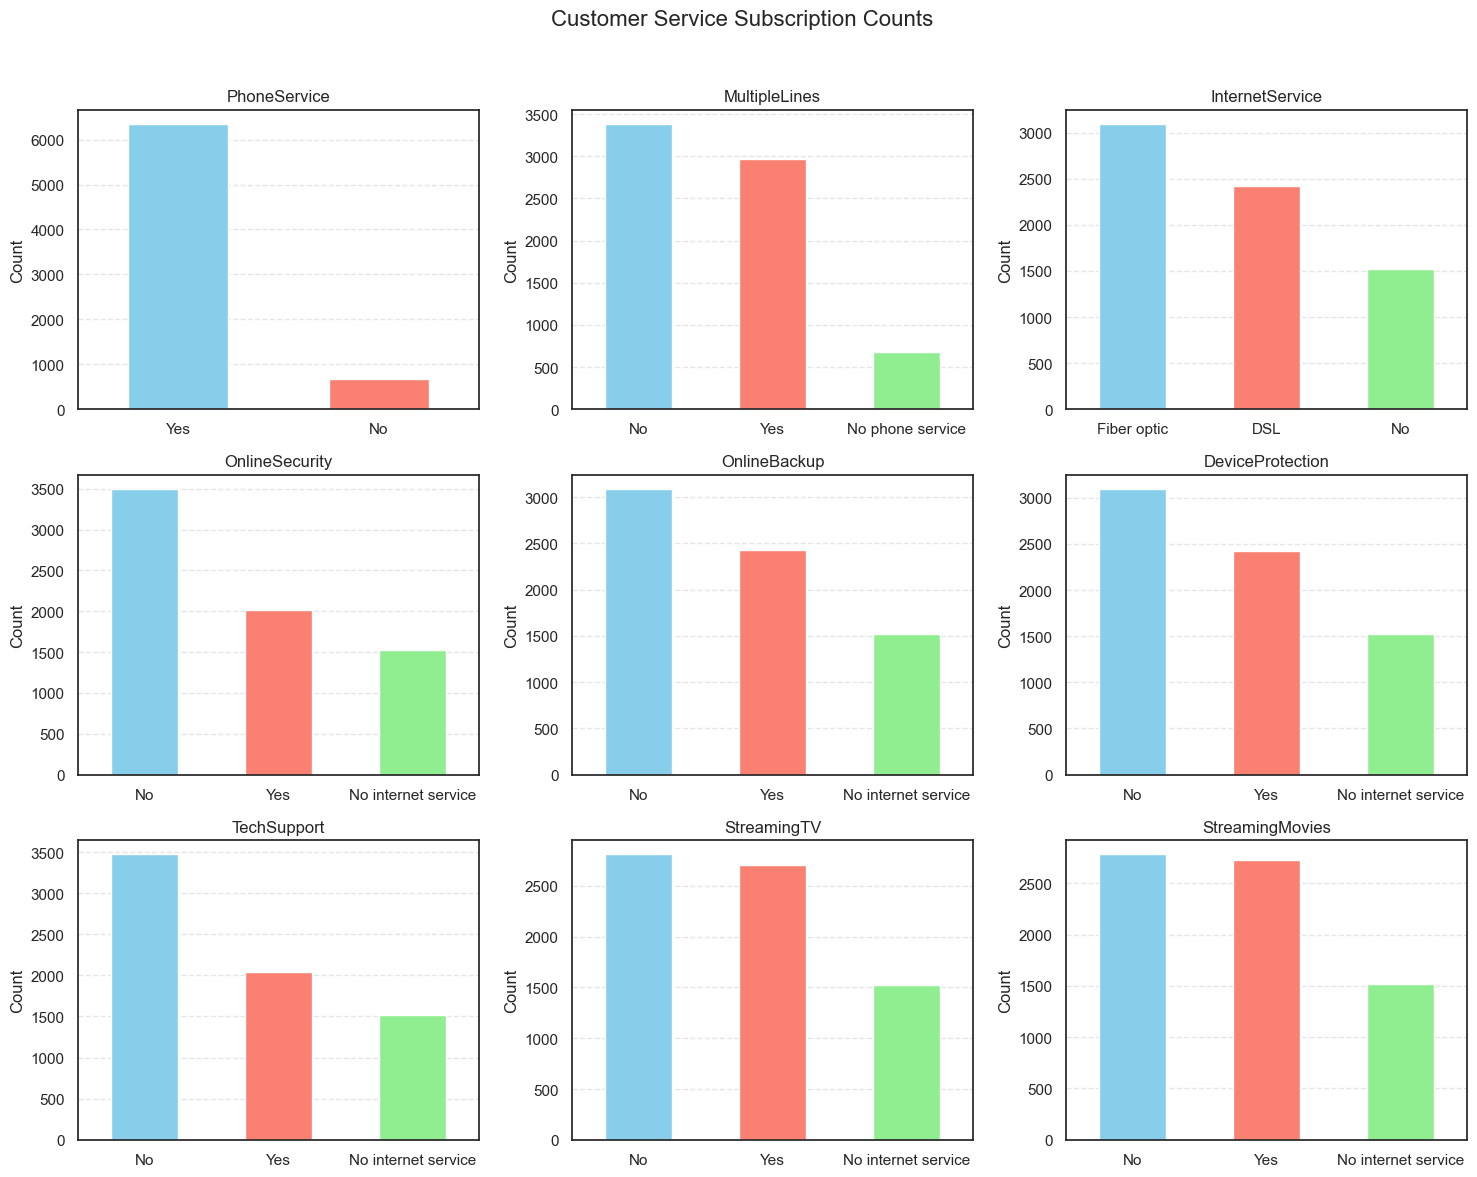

In [38]:

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
            'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
fig.suptitle('Customer Service Subscription Counts', fontsize=16)

for i, item in enumerate(services):
    row, col = divmod(i, 3)
    ax = df[item].value_counts().plot(
        kind='bar',
        ax=axes[row, col],
        rot=0,
        color=['skyblue', 'salmon', 'lightgreen'][:len(df[item].unique())]
    )
    
    ax.set_title(item, fontsize=12)
    ax.set_ylabel('Count')
    ax.set_xlabel('')
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**D.) Relation between monthly and total charges**

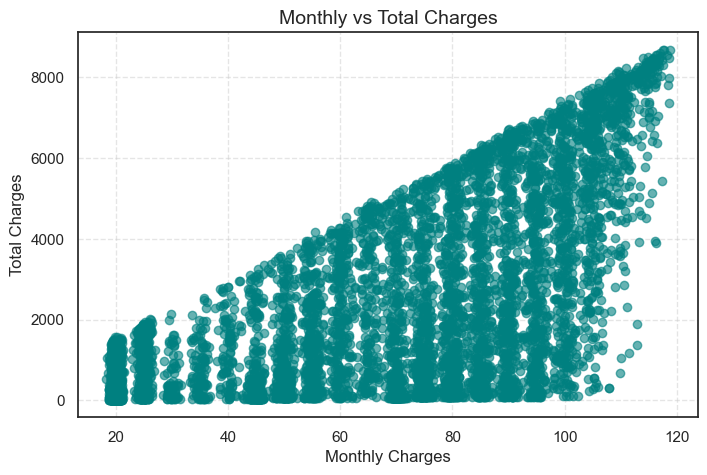

In [63]:
plt.figure(figsize=(8,5))
plt.scatter(df['MonthlyCharges'], df['TotalCharges'], alpha=0.6, color='teal')
plt.title('Monthly vs Total Charges', fontsize=14)
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**E.) Exploring Churn Interactions with Key Predictors**



Lets first look at the churn rate in our data

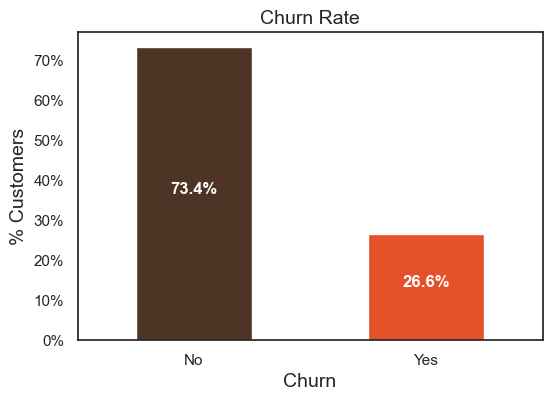

In [62]:
colors = ['#4D3425', '#E4512B']
churn_pct = df['Churn'].value_counts(normalize=True) * 100

ax = churn_pct.plot(kind='bar',
                    rot=0,
                    color=colors,
                    figsize=(6,4))

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

# Add % labels inside bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2,
            i.get_height()/2,
            f"{i.get_height():.1f}%",
            ha='center',
            fontsize=12,
            color='white',
            weight='bold')



1. Churn vs Tenure: 


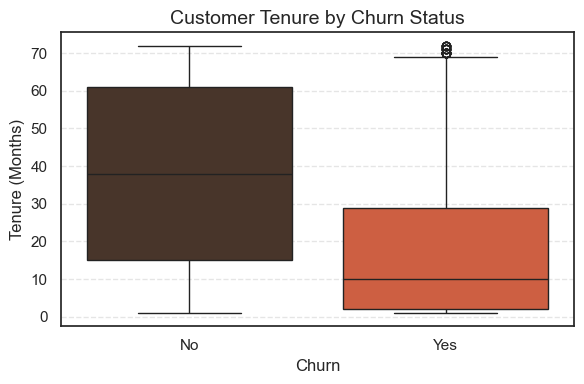

In [61]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,
            x='Churn',
            y='tenure',
            hue='Churn',  # Explicitly assign hue
            palette={'Yes': '#E4512B', 'No': '#4D3425'},
            dodge=False,
            legend=False)  # Suppress redundant legend

plt.title('Customer Tenure by Churn Status', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Tenure (Months)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


2. Churn by Contract Type:

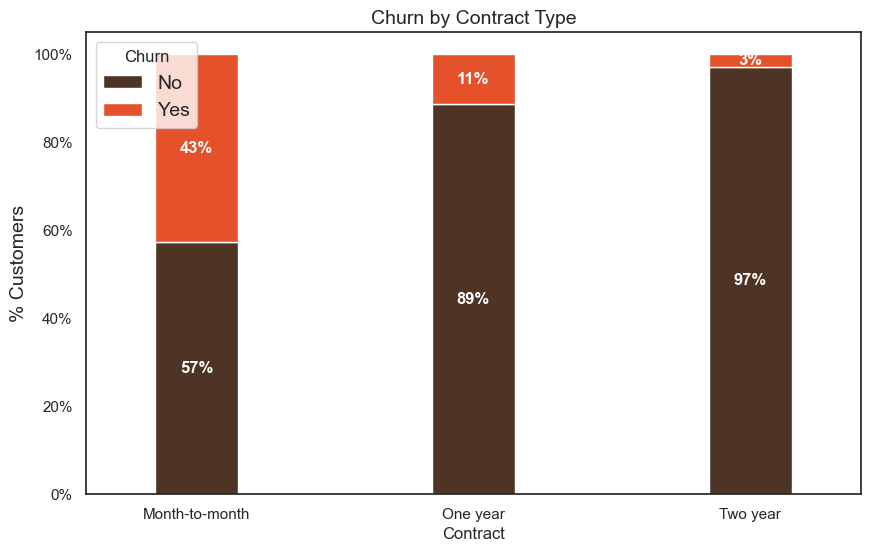

In [64]:
colors = ['#4D3425', '#E4512B']
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()

# Normalize to percentage
contract_pct = (contract_churn.T * 100.0 / contract_churn.T.sum()).T

# Plot
ax = contract_pct.plot(kind='bar',
                       stacked=True,
                       width=0.3,
                       rot=0,
                       figsize=(10,6),
                       color=colors)

# Format
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best', prop={'size':14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Contract Type', size=14)

# Add data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Avoid labeling zero-height bars
        ax.annotate(f'{height:.0f}%',
                    (x + width / 2, y + height / 2),
                    ha='center',
                    va='center',
                    color='white',
                    fontsize=12,
                    weight='bold')

3. Churn by Seniority

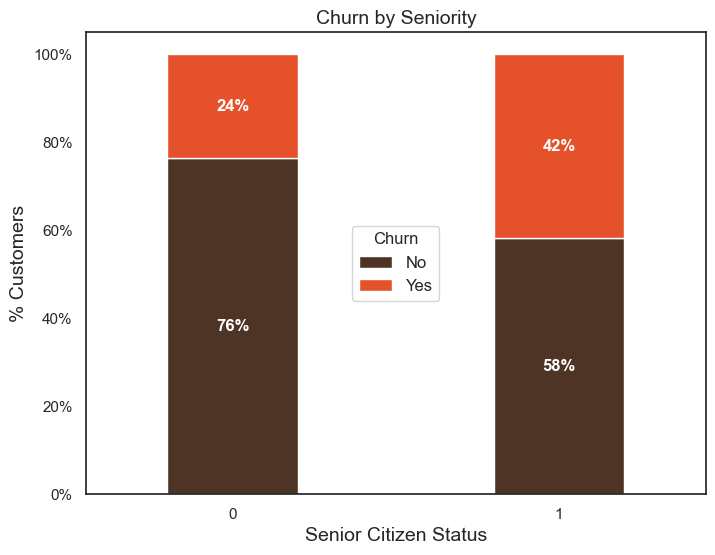

In [69]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

colors = ['#4D3425', '#E4512B']
senior_churn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Convert to percentage
senior_pct = (senior_churn.T * 100.0 / senior_churn.T.sum()).T

# Plot
ax = senior_pct.plot(kind='bar',
                     stacked=True,
                     color=colors,
                     figsize=(8,6),
                     width=0.4,
                     rot=0)

# Format
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Senior Citizen Status', size=14)
ax.set_title('Churn by Seniority', size=14)
ax.legend(title='Churn', loc='center', prop={'size':12})

# Add labels inside bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.0f}%',
                    (p.get_x() + p.get_width()/2, p.get_y() + height/2),
                    ha='center',
                    va='center',
                    color='white',
                    fontsize=12,
                    weight='bold')

4. Churn by Monthly Charges

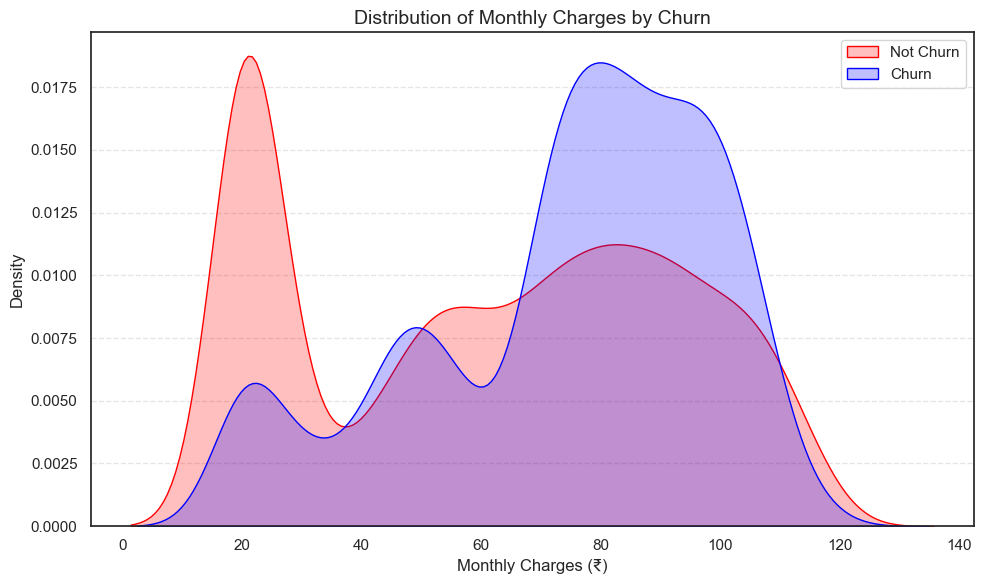

In [71]:
plt.figure(figsize=(10,6))

# KDE plots with updated 'fill' parameter
sns.kdeplot(data=df[df["Churn"] == 'No'],
            x='MonthlyCharges',
            fill=True,
            color='red',
            label='Not Churn')

sns.kdeplot(data=df[df["Churn"] == 'Yes'],
            x='MonthlyCharges',
            fill=True,
            color='blue',
            label='Churn')

# Formatting
plt.legend(loc='upper right')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Monthly Charges (₹)', fontsize=12)
plt.title('Distribution of Monthly Charges by Churn', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


4. Churn by Total Charges


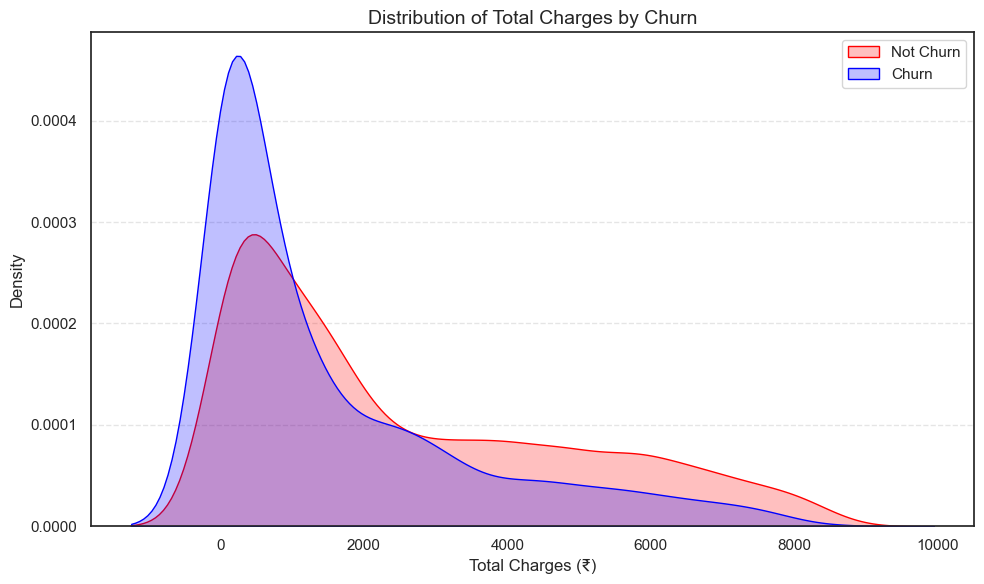

In [72]:
plt.figure(figsize=(10,6))

# KDE plots with updated 'fill' parameter
sns.kdeplot(data=df[df["Churn"] == 'No'],
            x='TotalCharges',
            fill=True,
            color='red',
            label='Not Churn')

sns.kdeplot(data=df[df["Churn"] == 'Yes'],
            x='TotalCharges',
            fill=True,
            color='blue',
            label='Churn')

# Formatting
plt.legend(loc='upper right')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Total Charges (₹)', fontsize=12)
plt.title('Distribution of Total Charges by Churn', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
